<a href="https://colab.research.google.com/github/Raghava2004-cpu/WnC-AI-ML-Project/blob/main/WnC_AI_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required libraries from python ....
here ,I used the fetch_openml to download the dataset from OpenML using the MNIST dataset id of 554

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

mnist = fetch_openml(data_id = 554)
mnist_data_df = pd.DataFrame(mnist.data)   # converting the mnist into DataFrame
mnist_target_df = pd.DataFrame(mnist.target)

fetch_opemml gives the data in Bunch Object similar to dictionary

In [2]:
print(mnist.data.shape)
print(mnist.target.shape)

(70000, 784)
(70000,)


the below line code is used to get the what number  is present at 55 th row in target the numbers are range from (0-9) so at position 55 it contain number '8

In [3]:
print(mnist.target[55])

8


To visualize the image ....
intially the number is in the form of vector in mnist.data in 28*28 matrix using matplotlib we can see the image of number ...
matshow takes the 2-d array as input so converting into 2-d by using the numpy

<Figure size 640x480 with 0 Axes>

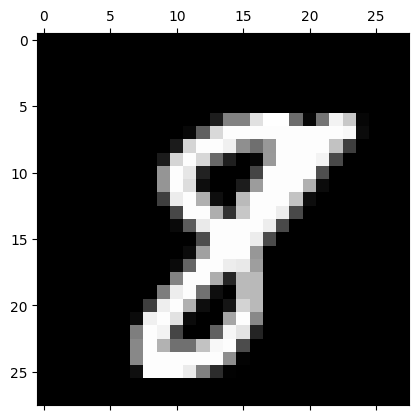

In [4]:
image_size = 28
image_data = np.array(mnist_data_df.iloc[55 , 0:]).reshape(image_size , image_size)
plt.gray()
plt.matshow(image_data)
plt.show()

In [5]:
print(mnist_data_df.shape)
print(mnist_target_df.shape)

(70000, 784)
(70000, 1)


In [6]:
mnist_target_df.astype('int')

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [7]:

x = mnist_data_df.iloc[0:6000 ]
y = mnist_target_df.iloc[0:6000]
print(x.shape)
print(y.shape)

(6000, 784)
(6000, 1)


In [8]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 ,random_state = 42 )

In [9]:
print(x_train.shape)
y_train = np.ravel(y_train)
print(y_train.shape)

(4200, 784)
(4200,)


In [12]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(multi_class = 'multinomial' , solver = 'lbfgs' , max_iter = 1000)
model.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [17]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
predicted = model.predict(x_test)
y_test = np.ravel(y_test)
print(f"Accuracy Score of Test data : {accuracy_score(y_test  , predicted)*100}")
print(f"Confusion Matrix : {confusion_matrix(y_test , predicted)}")
print(f"Classificaion Report : {classification_report(y_test , predicted)}")

Accuracy Score of Test data : 88.1111111111111
Confusion Matrix : [[156   0   0   0   0   2   2   1   3   1]
 [  0 183   2   0   0   0   0   0   4   1]
 [  1   1 159   7   5   1   3   3   8   1]
 [  1   1   5 164   1   7   1   4   3   4]
 [  0   1   1   0 160   0   4   2   1  12]
 [  2   1   2   8   4 119   5   0   8   3]
 [  0   1   1   1   0   0 169   1   1   0]
 [  0   4   2   4   4   0   0 187   2   7]
 [  2   6   7   5   3   5   7   0 135   2]
 [  1   0   0   2   4   1   0  11   3 154]]
Classificaion Report :               precision    recall  f1-score   support

           0       0.96      0.95      0.95       165
           1       0.92      0.96      0.94       190
           2       0.89      0.84      0.86       189
           3       0.86      0.86      0.86       191
           4       0.88      0.88      0.88       181
           5       0.88      0.78      0.83       152
           6       0.88      0.97      0.93       174
           7       0.89      0.89      0.89    

Visualizing The Confusion Matrix using the seaborn

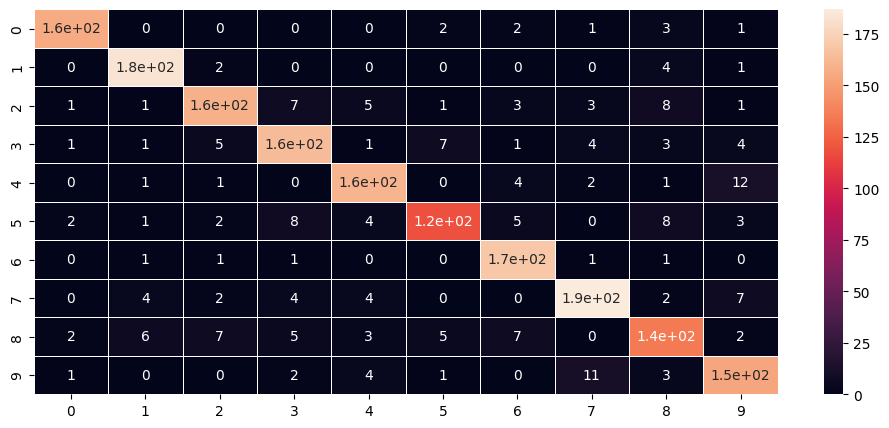

In [21]:
cn = confusion_matrix(y_test , predicted)
plt.figure(figsize = (12,5))
sns.heatmap(cn , annot = True , linewidth = 0.5)
plt.show()

Printing the Coef_ and intercept_ ....
the data we take contain 784 features so we get 784 weights ...
784 weights only for one number in this we have 10 numbers (0-9) so each have individual intercept and weights

In [25]:
print(model.intercept_)  # prints all the digits (intercepts) ==>(0-9)
print(f"Intercept of digit '1' {model.intercept_[1]}" )
print(f"Coefficients of digit  '1' {model.coef_[1]}")   #prints the weights of only '0'

[-1.47209922e-04  4.34294589e-05  2.49506937e-04 -1.37035670e-04
  1.49011575e-04  5.81915360e-04 -4.63962812e-05  2.50769797e-04
 -7.37560040e-04 -2.06431214e-04]
Intercept of digit '1' 4.342945894166165e-05
Coefficients of digit  '1' [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.26140217e-06
 -3.14113874e-06 -3.12877205e-06 -1.86911157e-06 -7.08418948e-06
 -5.62350300e-06 -7.73990835e-06 -6.64766450e-06 -8.56442992e-06
 -5.94217108e-06 -3.87137800e-06 -3.39199058e-06 